In [164]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [165]:
df = pd.DataFrame(np.load('proyecto_training_data.npy'), columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [167]:
cols_na = [col for col in df.columns if(df[col].isnull().mean() > 0.06)]
df[cols_na].isnull().mean()

LotFrontage    0.177397
dtype: float64

### El criterio que hemos utilizado hasta el momento es que una columna debe estar abajo del 6% de NA para ser rescatable, por consiguiente removere la columnas arriba de este porcentaje

In [168]:
df=df.drop(columns=cols_na)

# Split Data

In [169]:
y_var="SalePrice"
#x_var=list(df.columns)
#x_var.remove('SalePrice')
#X_train, X_test, y_train, y_test = train_test_split(df[x_var], df["SalePrice"], test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [170]:
train.shape

(1168, 5)

In [171]:
test.shape

(292, 5)

# Analisis Exploratorio


# Se analizara la data de entrenamiento

## Min, max, Std, Rango, Media

In [172]:
df_train=pd.DataFrame(train)

In [173]:
data_info = df_train.describe()
data_info

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,181441.541952,6.121575,1169.354452,6.561644,1970.965753
std,77263.583862,1.367619,386.675268,1.619706,30.675495
min,34900.000000,1.000000,334.000000,2.000000,1872.000000
25%,130000.000000,5.000000,888.000000,5.000000,1953.000000
50%,165000.000000,6.000000,1095.000000,6.000000,1972.000000
75%,214925.000000,7.000000,1396.750000,7.000000,2001.000000
max,745000.000000,10.000000,4692.000000,14.000000,2010.000000


In [174]:
for column in df_train.columns:
    print(f"{column}  range: {df_train[column].max() - df_train[column].min() }")

SalePrice  range: 710100.0
OverallQual  range: 9.0
1stFlrSF  range: 4358.0
TotRmsAbvGrd  range: 12.0
YearBuilt  range: 138.0


## Histogramas

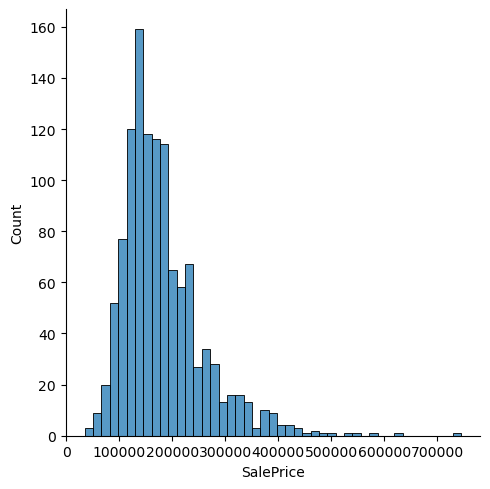

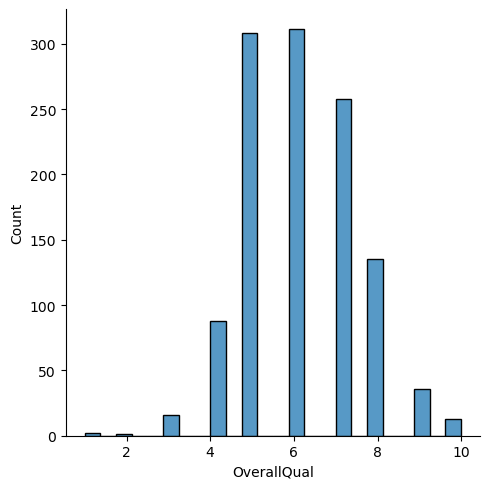

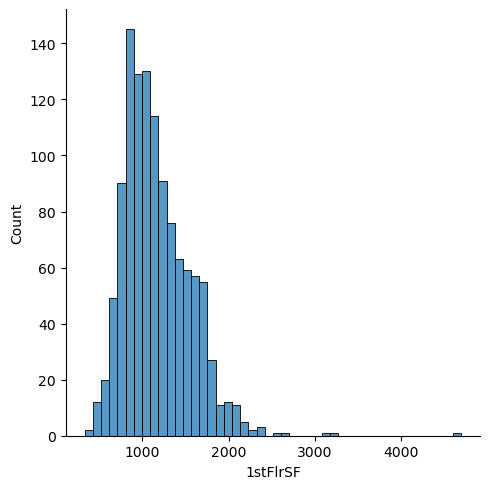

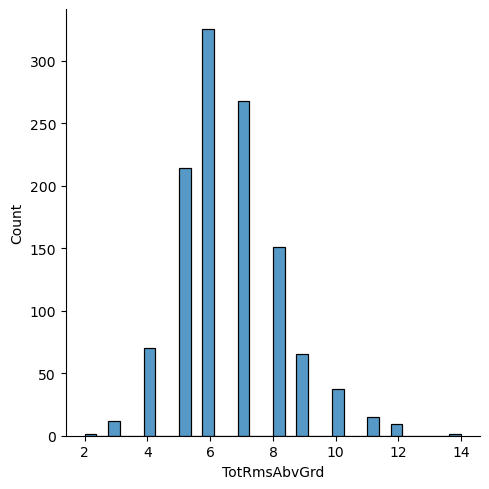

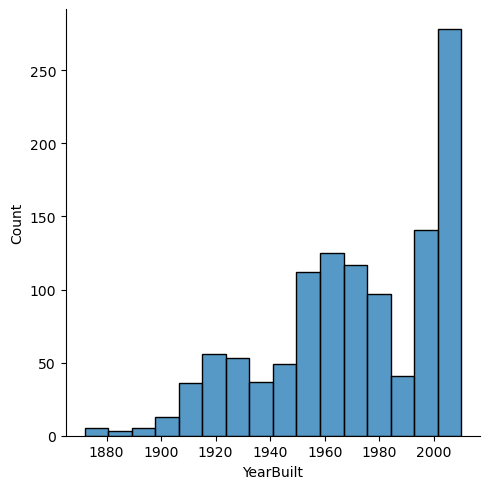

In [175]:
for column in df_train.columns:
    sns.displot(data=df_train, x=column)

## Correlacion

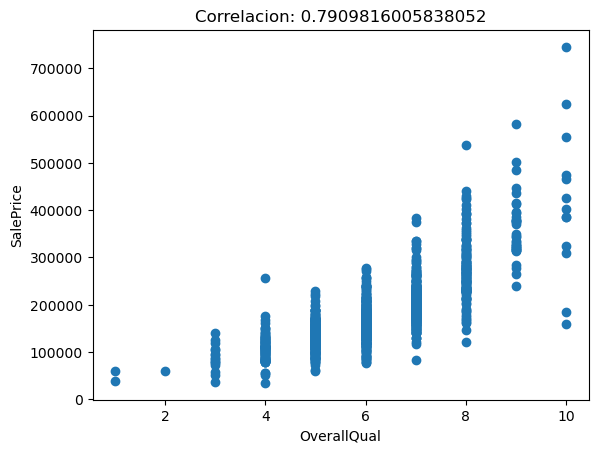

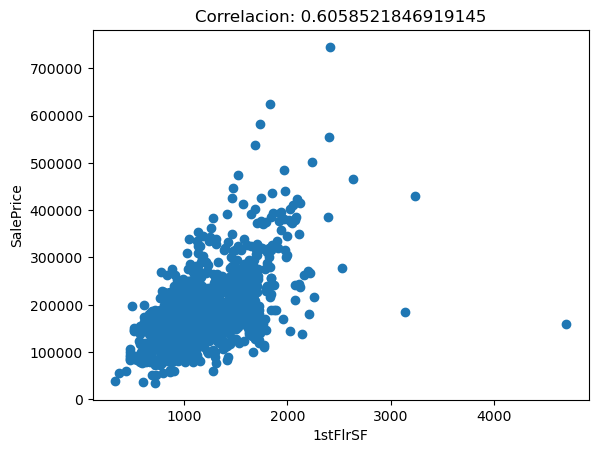

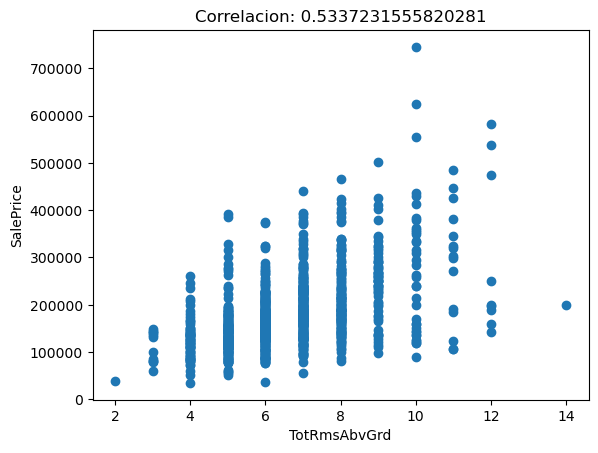

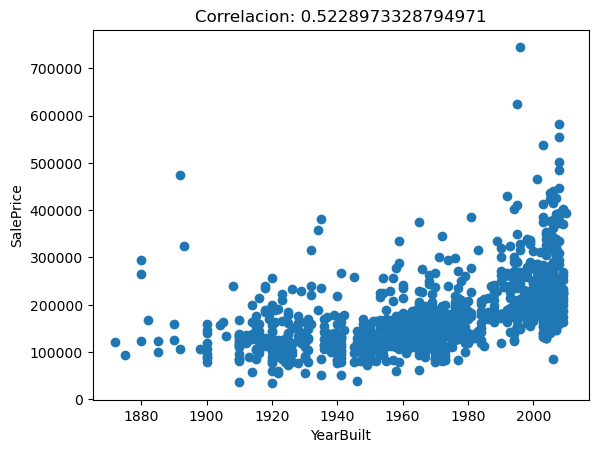

In [176]:
N=len(df_train.index)
for column in df_train.columns:
    if column != y_var:
        plt.scatter(df_train[column], df_train[y_var])
        plt.xlabel(column)
        plt.ylabel(y_var)
        plt.title(f"Correlacion: {df[column].corr(df[y_var])}")
        plt.show()

### Las variables con Mayor correlacion son OverallQual y 1stFlrSF

# Modelos

## Modelo Manual

In [177]:
def linear_regression(x, y, epochs, imprimir_error_cada, learning_rate):
    matrix = np.hstack([x, np.atleast_2d(np.ones(len(x))).T])
    B = np.random.rand(2,1)
    results = []
    errors = []
    for i in range(1,epochs+1):
        y_pred=np.dot(matrix, B)
        error=1/(2*y.shape[0])*((y_pred - y)**2).sum()
        errors.append(error)
        results.append(B)
        if (not i % imprimir_error_cada):
            print(f"{i}. Error {error}")
        B = B-learning_rate*np.array([[(1/y.shape[0])*((y_pred - y)*x).sum()], [(1/y.shape[0])*(y_pred - y).sum()]])
    return errors, results
    

In [178]:
def error_graph(errors, column):
    plt.scatter(np.arange(len(errors)), errors)
    plt.xlabel("Iteracion")
    plt.ylabel("Error")
    plt.title(column)
    plt.show()

In [179]:
def graph_models(models, n, independent_var, dependent_var, x_scatter, y_scatter):
    for j in range(len(models)):  # or range(len(theta))
            x = np.linspace(x_scatter.min(),x_scatter.max(),100)
            y = x*models[j][0]+models[j][1]
            if (not j % n):
                name =f"{dependent_var}={models[j][0]}{independent_var}+{models[j][1]}"
                plt.plot(x, y, '-r', label=name)
                plt.scatter(x_scatter, y_scatter)
                plt.title(f"Graph of {name}")
                plt.xlabel(independent_var, color='#1C2833')
                plt.ylabel(dependent_var, color='#1C2833')
                plt.legend(loc='upper left')
                plt.grid()
                plt.show()      

In [180]:
independent_var = "OverallQual"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
learning_rate =0.02
imprimir_error_cada=2
epochs=10
errors_OverallQual,results_OverallQual = linear_regression(x, y, epochs, imprimir_error_cada, learning_rate)

2. Error 2036418840.1390355
4. Error 1355359407.380914
6. Error 1353607089.0260544
8. Error 1352821452.6951497
10. Error 1352040089.3732424


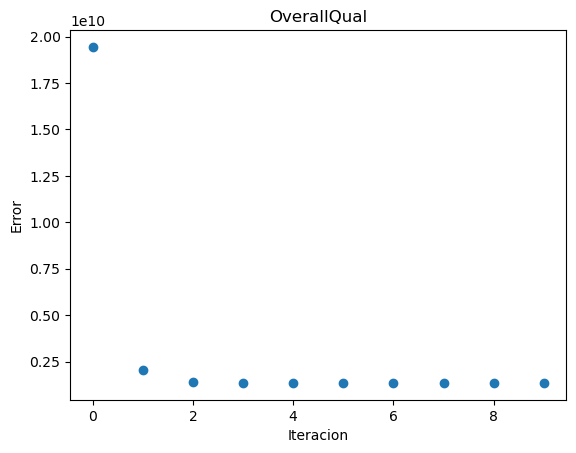

In [181]:
error_graph(errors_OverallQual, independent_var)

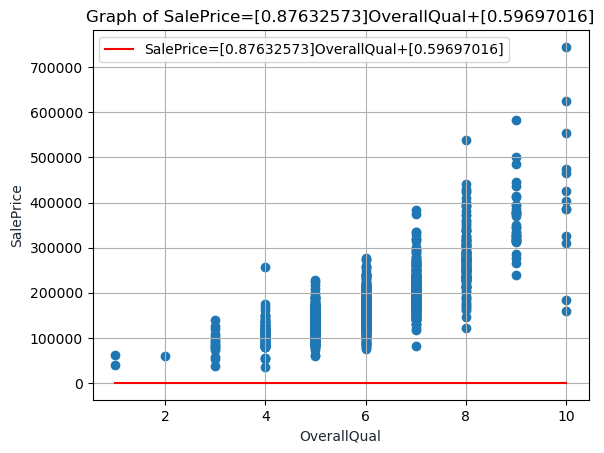

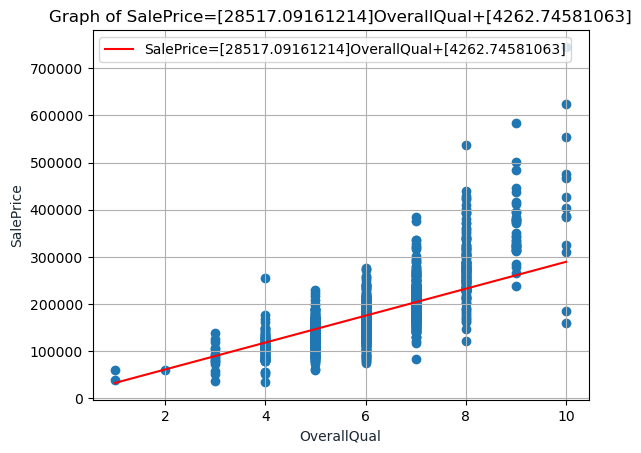

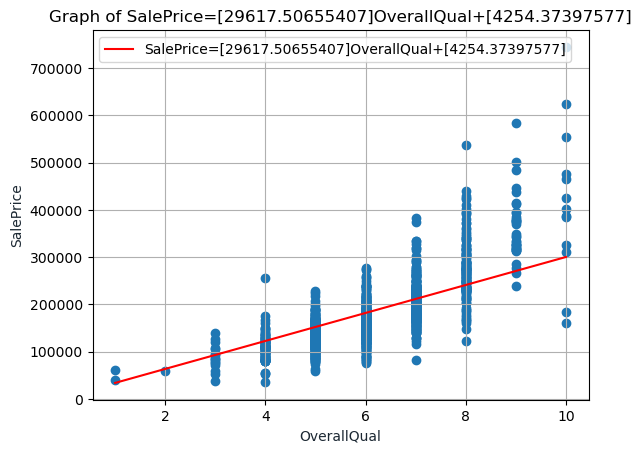

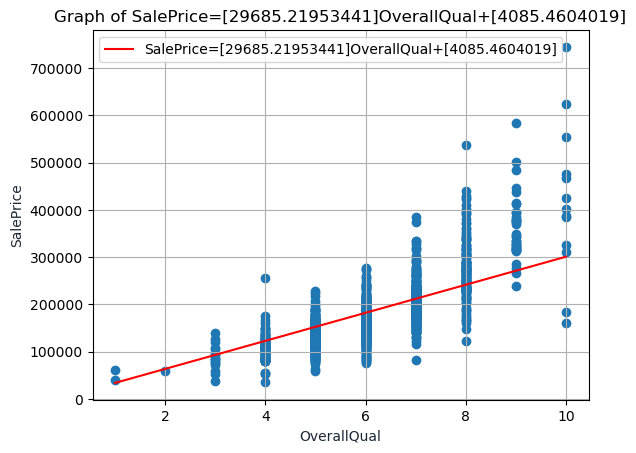

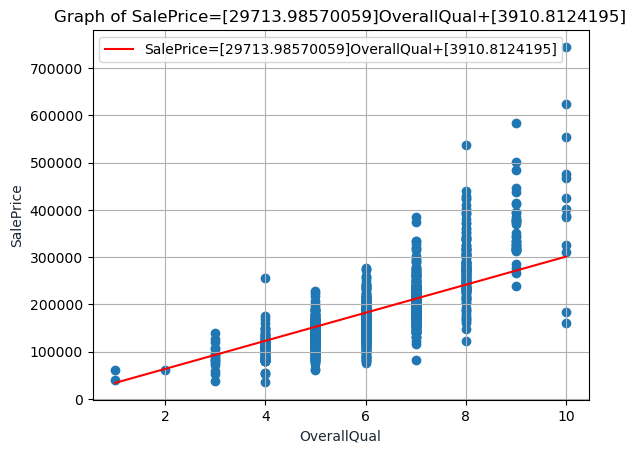

In [182]:
graph_models(results_OverallQual, 2, independent_var, dependent_var, x, y)

In [183]:
independent_var = "1stFlrSF"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
scaler_X=StandardScaler()
scaler_X.fit(x)
scaled_X = scaler_X.transform(x)
scaler_y=StandardScaler()
scaler_y.fit(y)
scaled_y = scaler_y.transform(y)
learning_rate =0.08
imprimir_error_cada=4
epochs=50
errors_1stFlrSF,results_1stFlrSF = linear_regression(scaled_X, scaled_y, epochs, imprimir_error_cada, learning_rate)

4. Error 0.35008025207609395
8. Error 0.3389408997029865
12. Error 0.3332239738305781
16. Error 0.33028993957652963
20. Error 0.3287841378229198
24. Error 0.3280113319437637
28. Error 0.3276147133813091
32. Error 0.3274111612496207
36. Error 0.3273066944539708
40. Error 0.3272530801228271
44. Error 0.3272255642362135
48. Error 0.32721144256389234


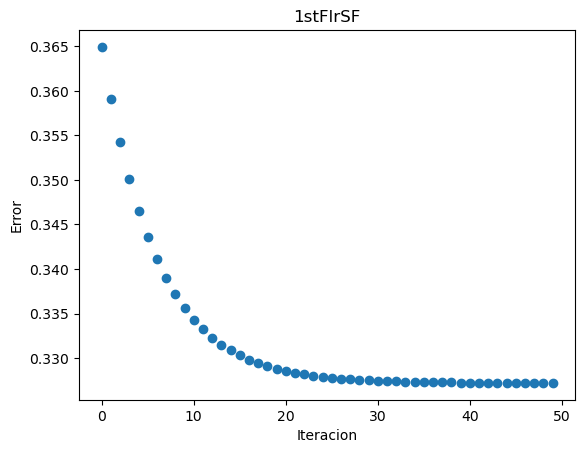

In [184]:
error_graph(errors_1stFlrSF, independent_var)

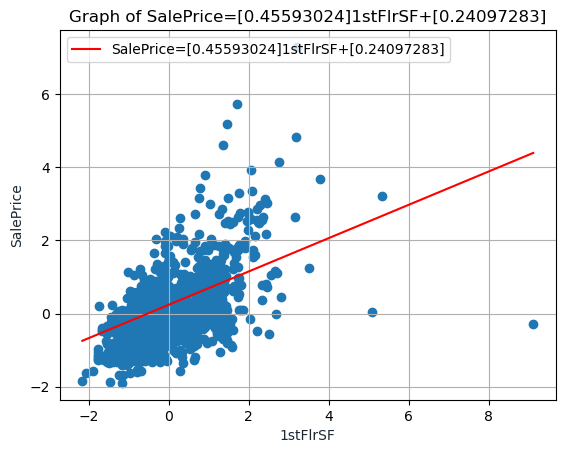

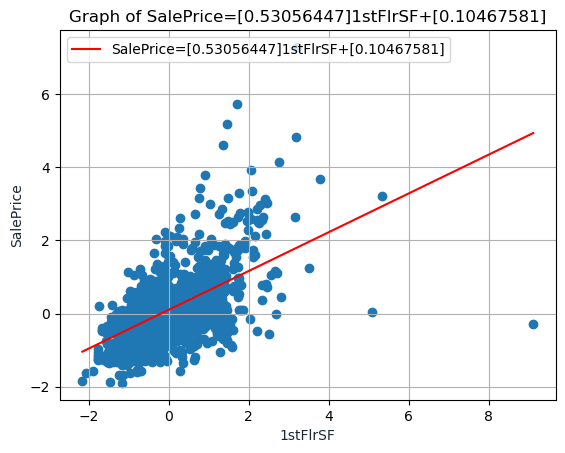

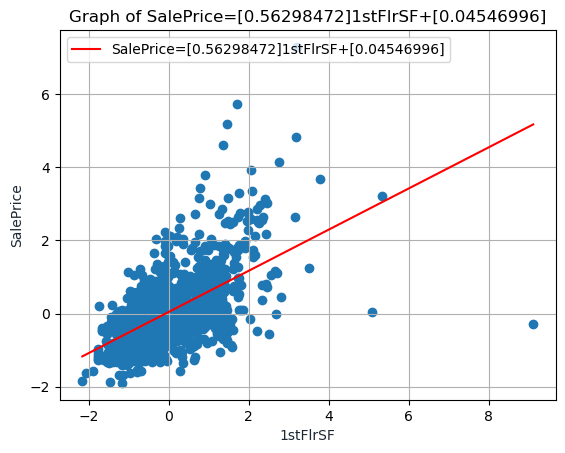

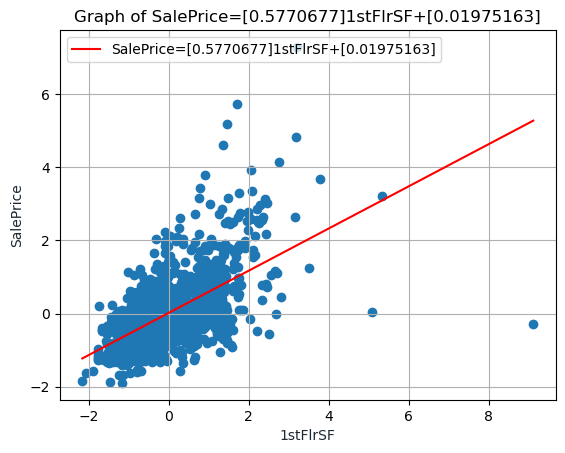

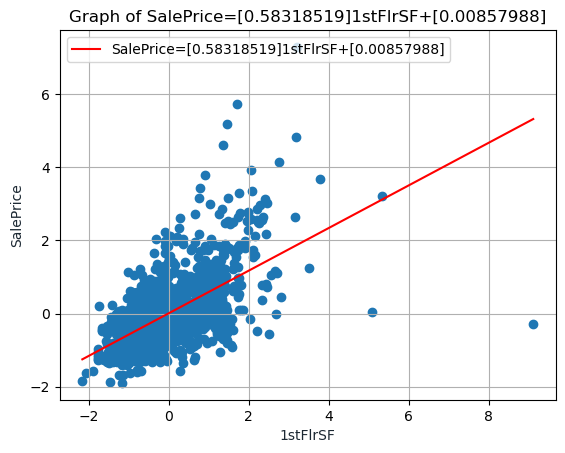

In [185]:
graph_models(results_1stFlrSF, 10, independent_var, dependent_var, scaled_X, scaled_y)

## Modelo Con ScikitLearn

In [186]:
independent_var = "OverallQual"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
reg_model_OverallQual = LinearRegression()
reg_model_OverallQual.fit(x,y)

LinearRegression()

In [187]:
independent_var = "1stFlrSF"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
scaler_X=StandardScaler()
scaler_X.fit(x)
scaled_X = scaler_X.transform(x)
scaler_y=StandardScaler()
scaler_y.fit(y)
scaled_y = scaler_y.transform(y)
reg_model_1stFlrSF = LinearRegression()
reg_model_1stFlrSF.fit(scaled_X,scaled_y)

LinearRegression()

## Modelo Promediado

In [188]:
def model_predictions(manual, scikit, x):
    manual_preds = manual[0]*x+manual[1]
    scikit_preds = scikit.predict(x)
    average_preds = (manual_preds+scikit_preds)/2
    return manual_preds, scikit_preds, average_preds

def get_error_in_range(y_test, preds):
    rmse=mean_squared_error(y_test, preds, squared=False)
    rango_y=np.max(y_test) - np.min(y_test)
    return rmse/rango_y

# Resultados

In [189]:
df_test=pd.DataFrame(test)
y_test=df_test["SalePrice"].values

In [190]:
manual_preds,scikit_preds, average_preds = model_predictions(results_1stFlrSF[-1], reg_model_1stFlrSF, scaler_X.transform(np.atleast_2d(df_test["1stFlrSF"].values).T))
manual_error = get_error_in_range(y_test, scaler_y.inverse_transform(manual_preds))
scikit_error = get_error_in_range(y_test, scaler_y.inverse_transform(scikit_preds))
average_error = get_error_in_range(y_test,  scaler_y.inverse_transform(average_preds))
print("SalePrice vs 1stFlrSF")
print(f"Modelo Manual Error {manual_error}")
print(f"Modelo ScikitLearn Error {scikit_error}")
print(f"Modelo Promediado Error {average_error}")

SalePrice vs 1stFlrSF
Modelo Manual Error 0.09204025865175315
Modelo ScikitLearn Error 0.09199893159115886
Modelo Promediado Error 0.09201923926491432


In [191]:
manual_preds,scikit_preds, average_preds = model_predictions(results_OverallQual[-1], reg_model_OverallQual, np.atleast_2d(df_test["OverallQual"].values).T)
manual_error = get_error_in_range(y_test, manual_preds)
scikit_error = get_error_in_range(y_test, scikit_preds)
average_error = get_error_in_range(y_test, average_preds)
print("SalePrice vs OverallQual")
print(f"Modelo Manual Error {manual_error}")
print(f"Modelo ScikitLearn Error {scikit_error}")
print(f"Modelo Promediado Error {average_error}")

SalePrice vs OverallQual
Modelo Manual Error 0.08144271396250638
Modelo ScikitLearn Error 0.07194583564898908
Modelo Promediado Error 0.07531624574188392


## El modelo con el error RMSE mas bajo dentro del rango de la variable y en ambos casos sigue siendo el modelo de scikitlearn. El modelo para la variable 